# CASE STUDY - I (INDIAN STARTUPS)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv 
import pandas as pd

### NUMBER OF FUNDINGS

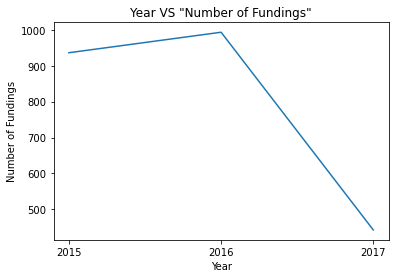

2015 936
2016 993
2017 443


In [3]:
with open("/Users/yashlakhwani/Library/Mobile Documents/com~apple~CloudDocs/DATA SET/indian_startup.csv") as f:
    data = csv.DictReader(f, skipinitialspace = True)
    keys = []
    values = []
    d = {}
    for i in data:
        year = i['Date'][-4:]
        d[year] = d.get(year, 0) + 1
        
    for i in d:
        keys.append(i)
        values.append(d[i])
        
    keys.reverse()
    values.reverse()
    
    np_year = np.array(keys)
    np_funding = np.array(values)
    
    plt.plot(np_year, np_funding)
    plt.xlabel("Year")
    plt.ylabel("Number of Fundings")
    plt.title('Year VS "Number of Fundings"')
    plt.show()
    
for i in range(len(keys)):
    print(keys[i], values[i])

### TOP INDIAN CITIES

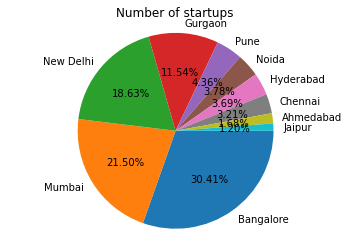

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [4]:
with open("/Users/yashlakhwani/Library/Mobile Documents/com~apple~CloudDocs/DATA SET/indian_startup.csv") as f:
    data = csv.DictReader(f, skipinitialspace = True)
    keys = []
    values = []
    top_city = []
    no_startup = []
    d = {}
    for i in data:
        city = i['CityLocation'].split('/')[0].strip()
        if city == 'Delhi':
            city = 'New Delhi'
        if city == 'bangalore':
            city = 'Bangalore'

        if city != '':
            d[city] = d.get(city, 0) + 1
     
    for i in d:
        keys.append(i)
        values.append(d[i])

    values.sort()
    values.reverse()
    
    for i in range(10):
        for j in d:
            if d[j] == values[i]:
                top_city.append(j)
                no_startup.append(d[j])
        
    np_city = np.array(top_city)
    np_statrtups = np.array(no_startup)
    
    plt.pie(np_statrtups, labels = np_city, counterclock = False, autopct = '%.2f%%')
    plt.title("Number of startups")
    plt.axis('equal')
    plt.show()
    
for i in range(10):
    print(top_city[i], no_startup[i])

### FUNDING AMOUNT

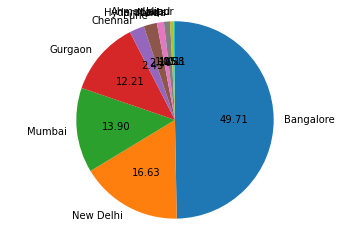

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [5]:
df = pd.read_csv("/Users/yashlakhwani/Library/Mobile Documents/com~apple~CloudDocs/DATA SET/indian_startup.csv")
df.dropna(subset = ['CityLocation'], inplace = True)
def separateCity(city):
    return city.split('/')[0].strip()
df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('CityLocation')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[0:10]
city = df.index
amount = df.values
plt.pie(amount,labels = city,autopct='%0.2f',counterclock=False,startangle=90,radius=1.5)
plt.axis('equal')
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(city)):
    print(city[i],format(percent[i],'0.2f'))

### INVESTMENT TYPE

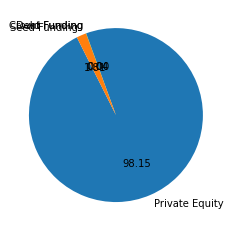

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [6]:
df = pd.read_csv("/Users/yashlakhwani/Library/Mobile Documents/com~apple~CloudDocs/DATA SET/indian_startup.csv")
df['InvestmentType'].replace('SeedFunding','Seed Funding', inplace = True)
df['InvestmentType'].replace('DebtFunding','Debt Funding', inplace = True)
df['InvestmentType'].replace('PrivateEquity','Private Equity', inplace = True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding', inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : float(str(x).replace(",","")))
df = df.groupby('InvestmentType')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:10]
investment = df.index
amount = df.values

plt.pie(amount,labels = investment,autopct='%0.2f',counterclock=False,startangle=110)
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(investment)):
    print(investment[i],format(percent[i],'0.2f'))

### TOP INDUSTRIES

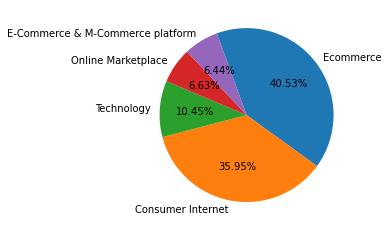

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [7]:
df = pd.read_csv("/Users/yashlakhwani/Library/Mobile Documents/com~apple~CloudDocs/DATA SET/indian_startup.csv")

df['IndustryVertical'].replace('ECommerce','Ecommerce',inplace = True)
df['IndustryVertical'].replace('eCommerce','Ecommerce',inplace = True)
df['IndustryVertical'].replace('ecommerce','Ecommerce',inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : float(str(x).replace(",","")))
df = df.groupby('IndustryVertical')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:5]

industry = df.index
amount = df.values

plt.pie(amount, labels = industry, autopct = '%.2f%%', counterclock = False, startangle = 110)
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(industry)):
    print(industry[i],format(percent[i],'0.2f'))

### TOP STARTUPS 

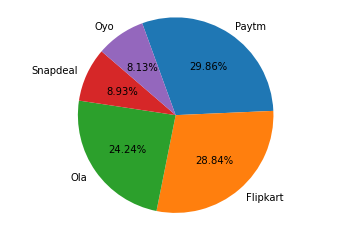

Paytm 29.86
Flipkart 28.84
Ola 24.24
Snapdeal 8.93
Oyo 8.13


In [8]:
df = pd.read_csv("/Users/yashlakhwani/Library/Mobile Documents/com~apple~CloudDocs/DATA SET/indian_startup.csv")

df['StartupName'].replace('Flipkart.com','Flipkart', inplace = True)
df['StartupName'].replace('Ola Cabs','Ola', inplace = True)
df['StartupName'].replace('Olacabs','Ola', inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo', inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm', inplace = True)
df['StartupName'].replace('Oyorooms','Oyo', inplace = True)
df['StartupName'].replace('OyoRooms','Oyo', inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo', inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('StartupName')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:5]

df
startUp = df.index
amount = df.values
plt.pie(amount, labels = startUp, counterclock = False, autopct = '%.2f%%', startangle = 110)
plt.axis('equal')
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(startUp)):
    print(startUp[i],format(percent[i],'0.2f'))

### FUNDING ROUNDS

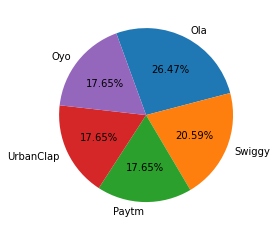

Ola 9
Swiggy 7
Paytm 6
UrbanClap 6
Oyo 6


In [9]:
df = pd.read_csv("/Users/yashlakhwani/Library/Mobile Documents/com~apple~CloudDocs/DATA SET/indian_startup.csv")

df['StartupName'].replace('Flipkart.com','Flipkart', inplace = True)
df['StartupName'].replace('Ola Cabs','Ola', inplace = True)
df['StartupName'].replace('Olacabs','Ola', inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo', inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm', inplace = True)
df['StartupName'].replace('Oyorooms','Oyo', inplace = True)
df['StartupName'].replace('OyoRooms','Oyo', inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo', inplace = True)

totalfunding = df['StartupName'].value_counts()[:5]

startupName = totalfunding.index
fundedcount = totalfunding.values

plt.pie(fundedcount, labels = startupName, autopct = '%.2f%%', counterclock = False, startangle = 110)
plt.show()

for i in range(len(startupName)):
    print(startupName[i], fundedcount[i])

### TOP INVESTOR

In [10]:
df = pd.read_csv("/Users/yashlakhwani/Library/Mobile Documents/com~apple~CloudDocs/DATA SET/indian_startup.csv")
df.InvestorsName.fillna('', inplace = True)
investors = df.InvestorsName

investors_name = []
for i in investors:
    if i != "":
        temp = i.split(",")
        for j in temp:
            investors_name.append(j.strip())
dct = {}
for i in investors_name:
    dct[i] = dct.get(i,0) + 1
for i in dct:
    if dct[i] == max(dct.values()):
        print(i, dct[i])

Sequoia Capital 64
